Computing the correlation

In [ ]:
# preparing the datasets
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

data_regions = pd.read_csv('data/rain_data.csv', index_col=0)
data_tw = pd.read_csv('data/tweet_df_class.csv', index_col=0)
data = data_regions.mean(axis=1)

data.index = pd.to_datetime(data.index)
data_tw = data_tw.set_index('Datetime')
data_tw.index = pd.to_datetime(data_tw.index).date.astype('datetime64')

In [ ]:
#making timeseries
tweets = data_tw['class'].truncate(before='2022-03-29')
tweets.name ='malaria instances'
rain = data
rain.name = 'rainfall'

#changing period
tweets_weekly = tweets.resample('W').sum()
rain_weekly = rain.resample('W').mean()
tweets_monthly = tweets.resample('M').sum()
rain_monthly = rain.resample('M').mean()

#lagging rainfalls
rain_weekly_1 = rain_weekly.shift(1).truncate(before='2022-04-03').rename('rainfall+1')
rain_weekly_2 = rain_weekly.shift(2).dropna().rename('rainfall+2')

#create a single dataset and check the correlations
months = pd.concat([tweets_monthly, rain_monthly], join='inner', axis=1)
week = pd.concat([tweets_weekly, rain_weekly, rain_weekly_1, rain_weekly_2], join='inner', axis=1)
pd.options.display.float_format = '{:,.2f}'.format
print(week.corr().iloc[:, 0].rename('pearson correlation with malaria instances'), '\n\n')
print(week.corr(method='spearman').iloc[:, 0].rename('spearman correlation with malaria instances'))

Creating barplots

In [ ]:
# create the bar plot
monthplot = sns.barplot(x=rain_monthly.index.month[:-1], y=rain_monthly.values[:-1], data=rain_monthly, color='blue')
monthplot.set(xlabel='Months', ylabel='Rainfall in MM', title='Monthly rainfall')
plt.show(monthplot)

In [ ]:
# the graph for the tweets
ax = sns.barplot(x=tweets_monthly.index.month, y=tweets_monthly.values, data=tweets_monthly, color= "orange")
ax.set(xlabel='months', ylabel='malaria instances', title = "malaria instances by months ")
plt.show(ax)

Creating lineplots

In [ ]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x=rain_weekly_1.index.week, y=zscore(rain_weekly_1.values), data=rain_weekly_1,lw=3)
b = sns.lineplot(x=tweets_weekly.index.week, y=zscore(tweets_weekly.values), data=tweets_weekly, lw=3)
b.set(xlabel='weeks', ylabel='malaria instance and precipitation in mm', title = "trend in relation between malaria instance and precipitation records for 1 weeks before")
plt.legend(labels=['precipitation in mm','malaria instance'], facecolor='white')

In [ ]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x=rain_weekly_2.index.week, y=zscore(rain_weekly_2.values), data=rain_weekly_1,lw=3)
b = sns.lineplot(x=tweets_weekly.index.week, y=zscore(tweets_weekly.values), data=tweets_weekly, lw=3)
b.set(xlabel='weeks', ylabel='malaria instance and precipitation in mm', title = "trend in relation between malaria instance and precipitation records for 2 weeks before")
plt.legend(labels=['precipitation in mm','malaria instance'], facecolor='white')

In [ ]:
e = sns.lineplot(data=zscore(months))
e.set(xticklabels=months.index.month, title = "trend in relation between malaria instance and precipitation records on the same months")
plt.show()

AttributeError: 'Rectangle' object has no property 'xticklabels'

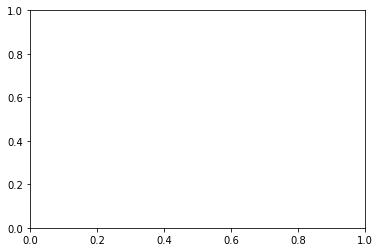

In [89]:
zscore(months).plot.bar(sharex=True, sharey=True, grid=True, xticklabels=months.index.month)

In [ ]:
zscore